<center><h1> Heart Disease Diagnosis </h1></center>

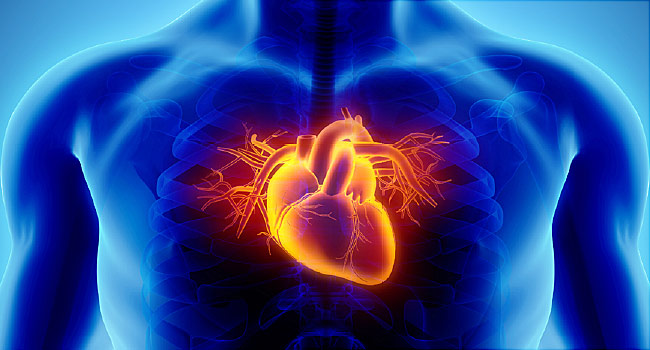

### Business Problem

### Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


### Problem Statemtent

<b> By using these data we have to Predict wheather a patient is suffering from heart disease or not based on different parameters</b>

### Data Description


    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)


### Business objectives and constraints

1. The cost of a mis-classification can be very high.
2. There is some latency concerns.

## Importing Necessary Libraries

In [ ]:
# Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf
%matplotlib inline

# Metrics for Classification technique
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.2 MB/s eta 0:00:00


### Mounting the GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

Our first step is to extract train and test data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [ ]:
# Importing Data

data = pd.read_csv("/content/heart.csv")
data.head(6) # Mention no of rows to be displayed from the top in the argument

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


# Exploratory Data Analysis

In [ ]:
#Size of the dataset
data.shape

(303, 14)

**We have a dataset with 303 rows which indicates a smaller set of data.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* Out of 14 features, we have 13 int type and only one with float data type.
* Woah! We have no missing values in our dataset.

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Let's check correleation between various features.**

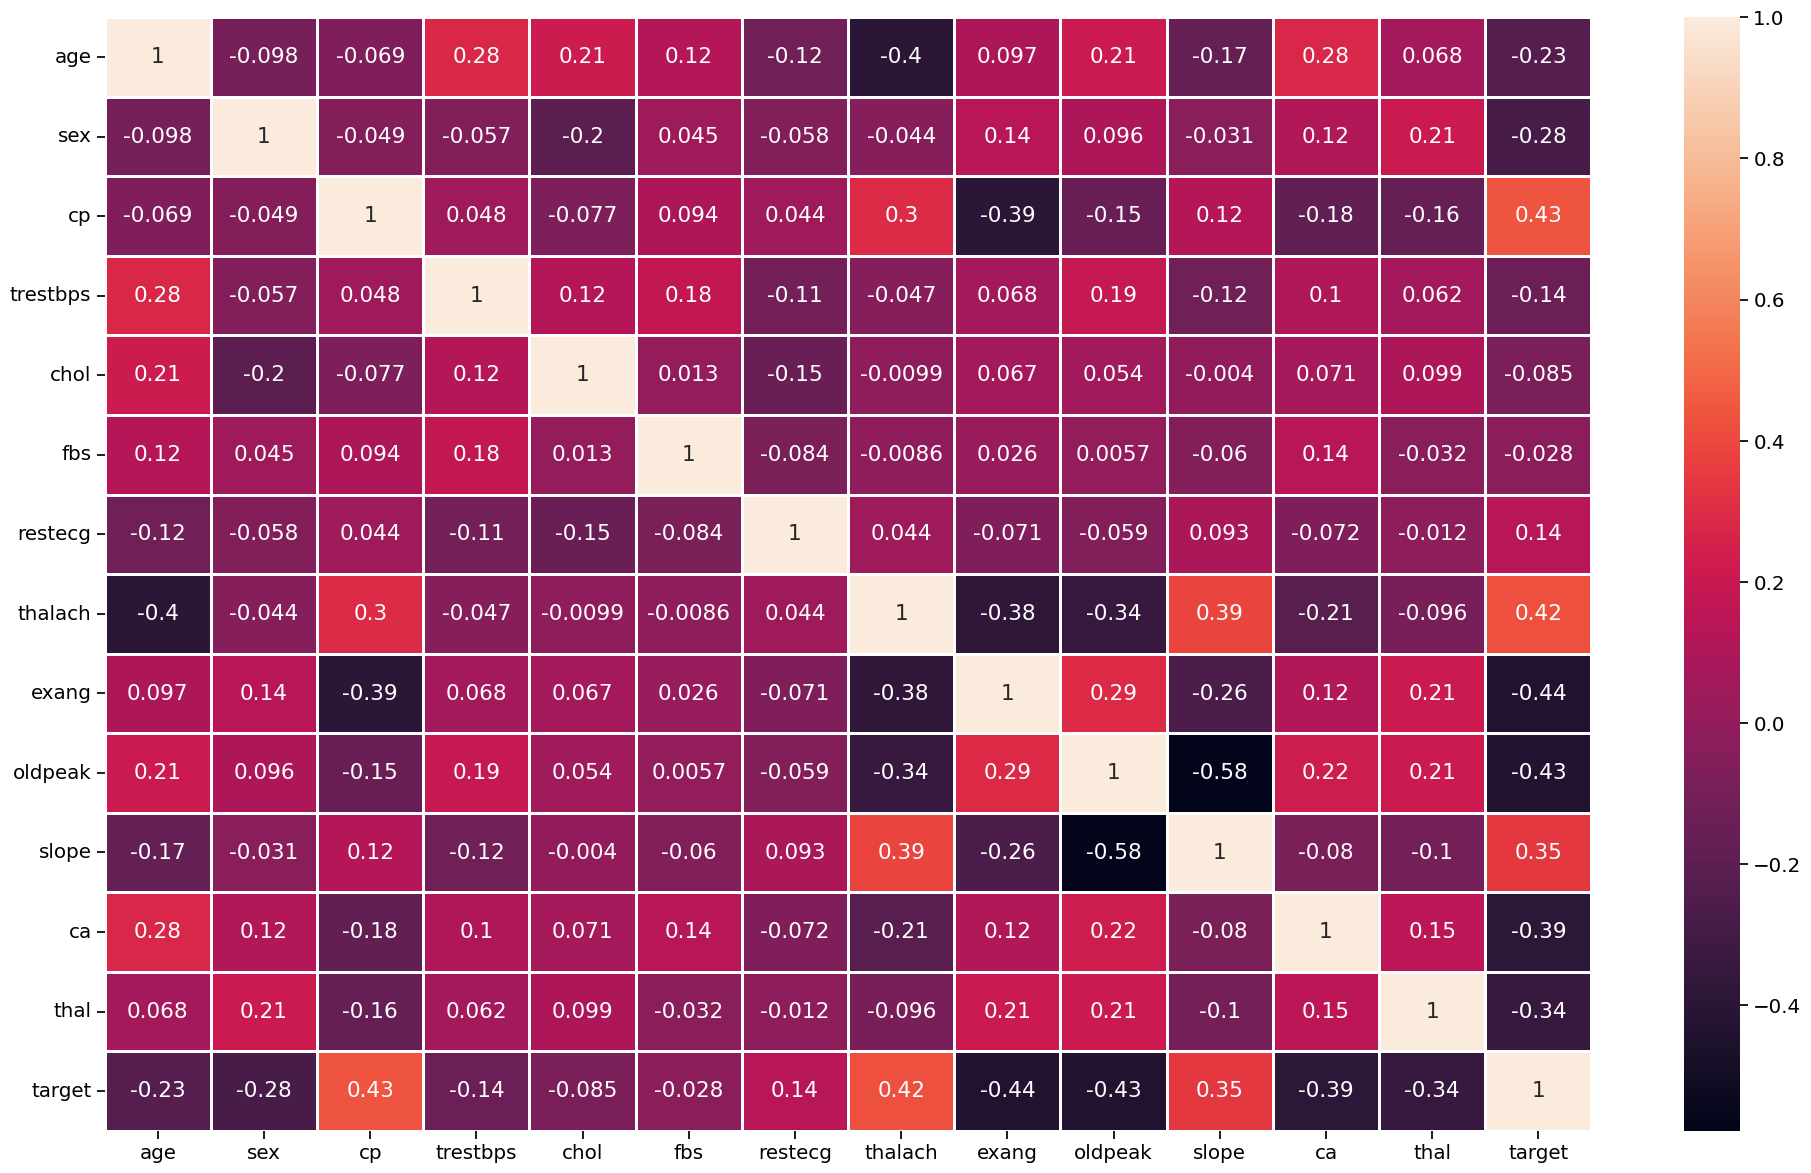

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

**Let's check the correlation of various features with the target feature.**

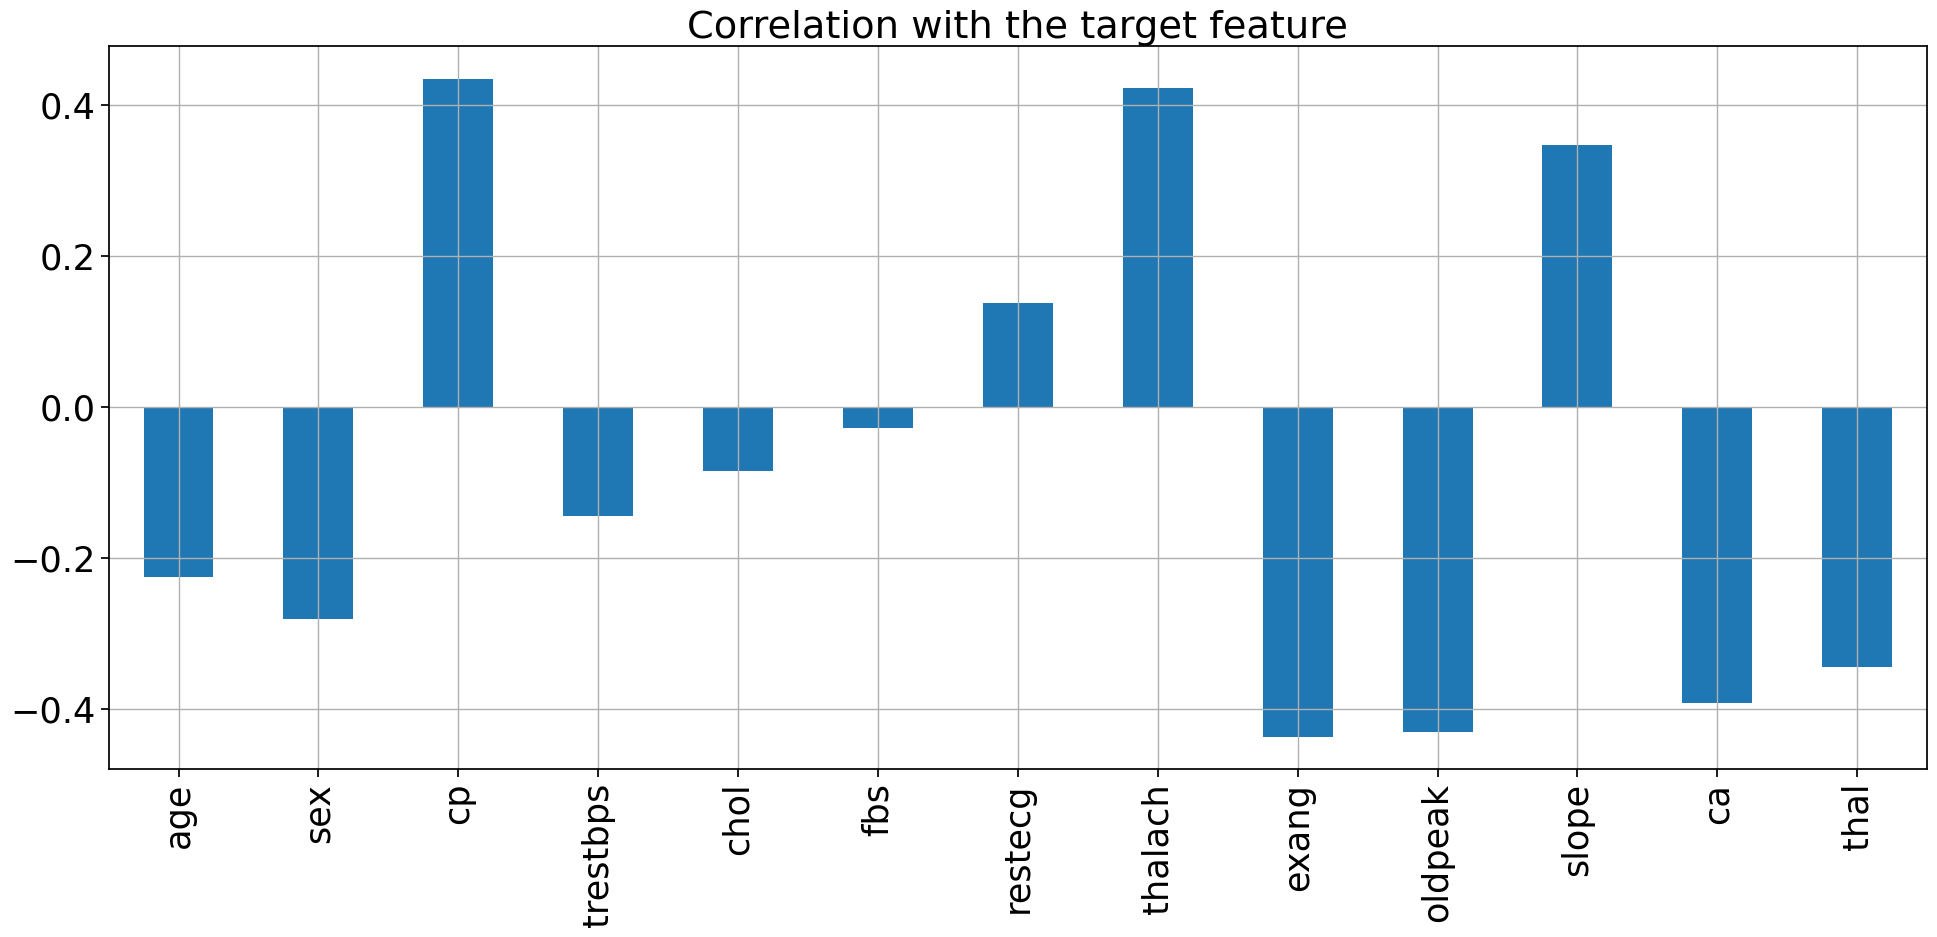

In [ ]:
# plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10),
                                                   title="Correlation with the target feature")
plt.tight_layout()

* Four feature( "cp", "restecg", "thalach", "slope" ) are positively correlated with the target feature.
* Other features are negatively correlated with the target feature.

**Individual Feature Analysis**

## Age("age") Analysis

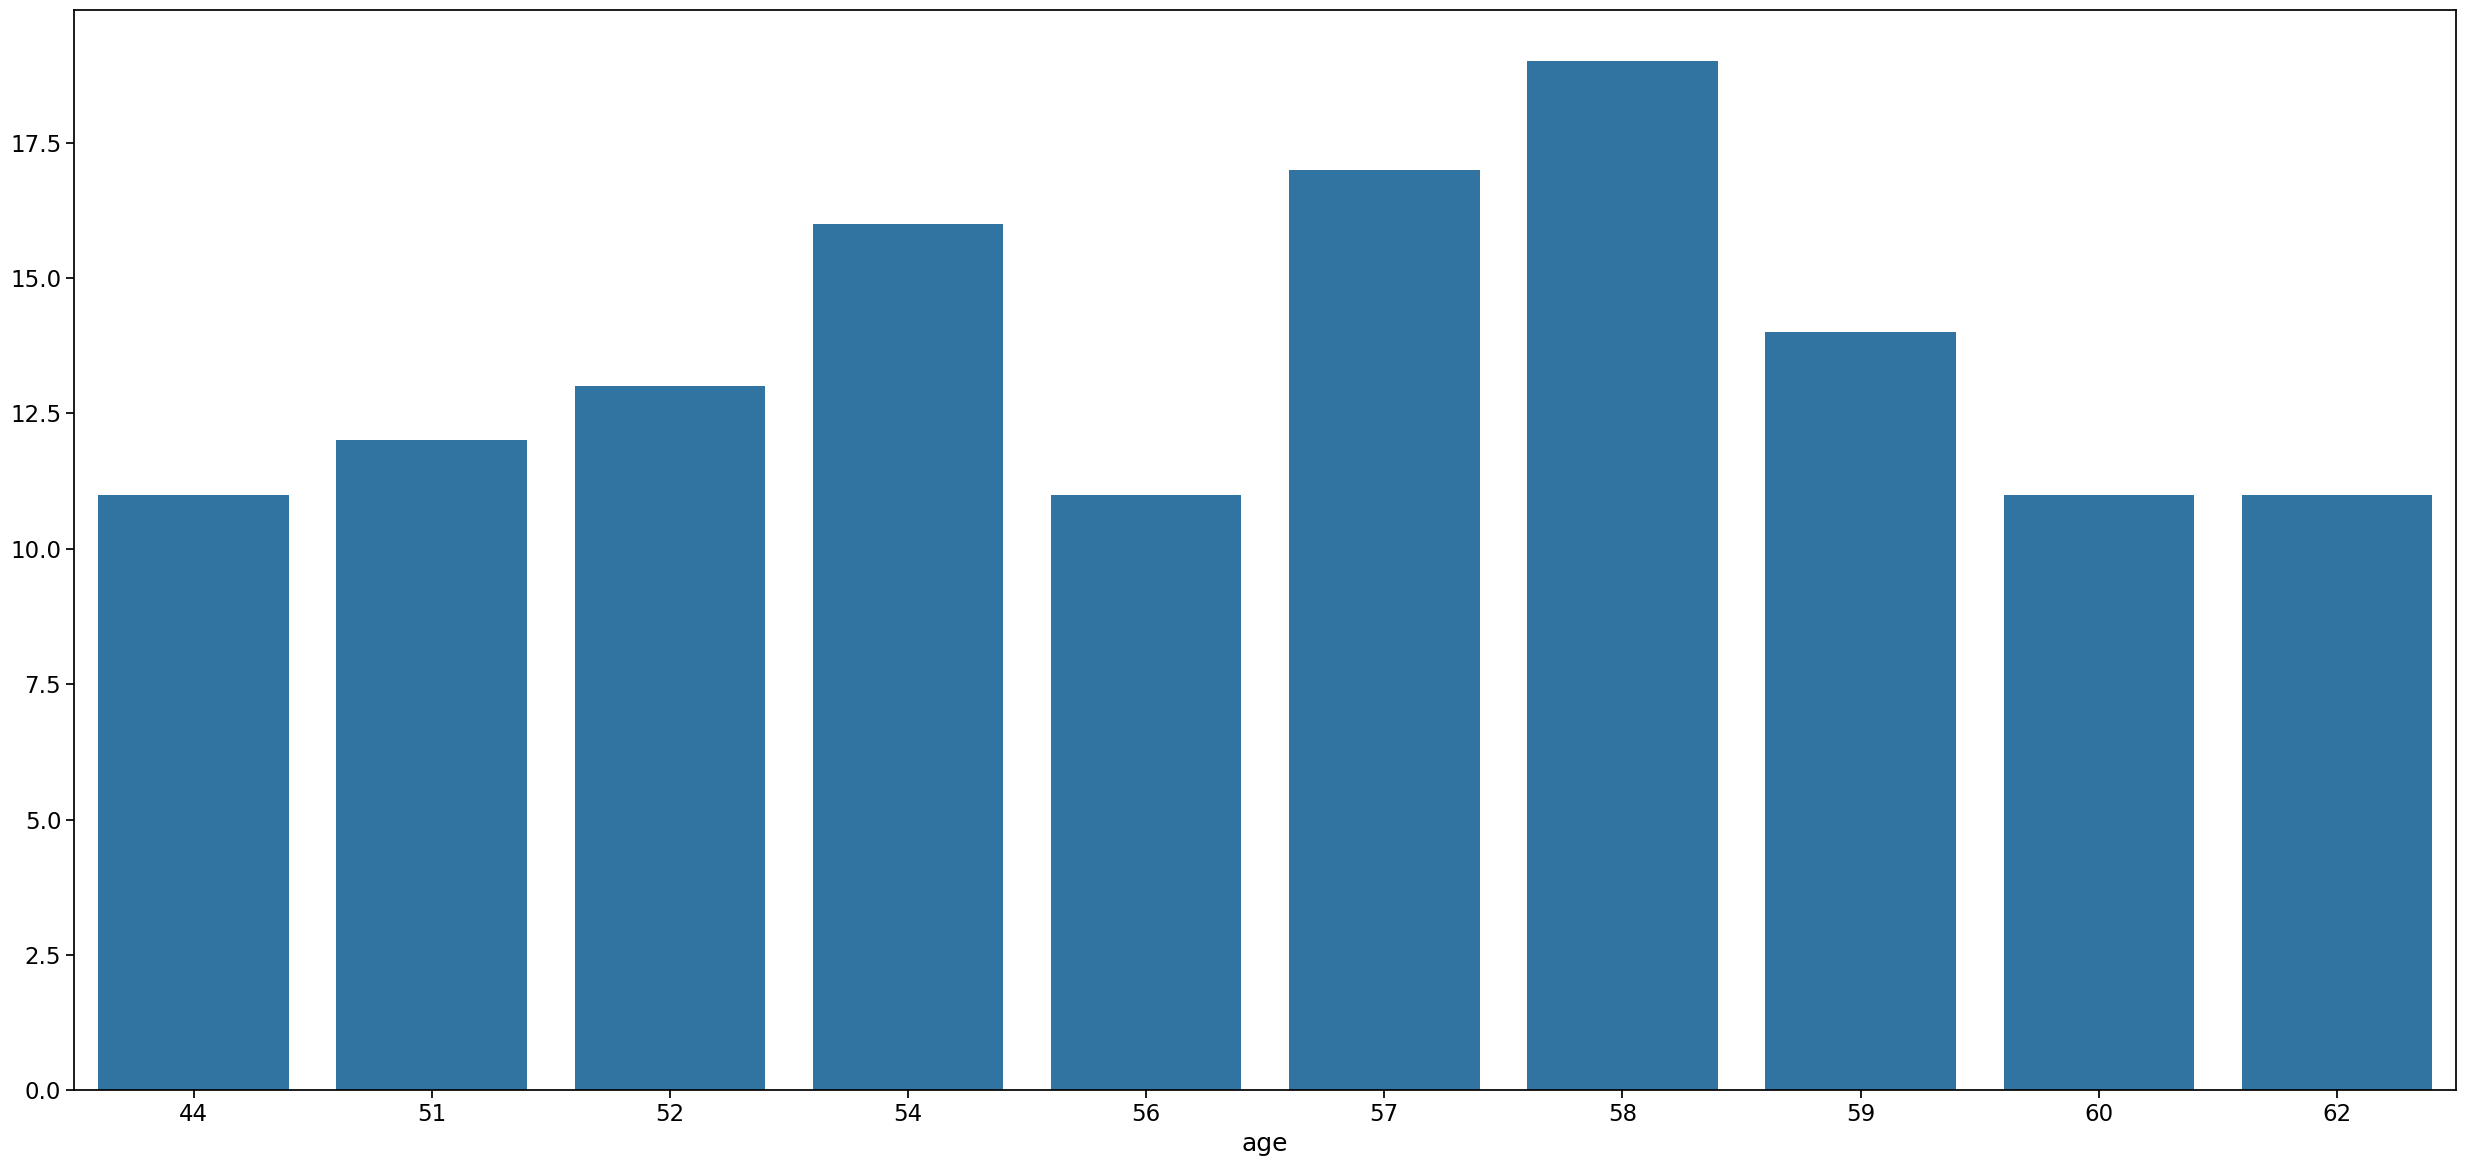

In [ ]:
# Let's check 10 ages and their count

plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

**Let's check the range of age in the dataset.**

In [ ]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


**We should divide the Age feature into three parts - "Young", "Middle" and "Elder"**

In [ ]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

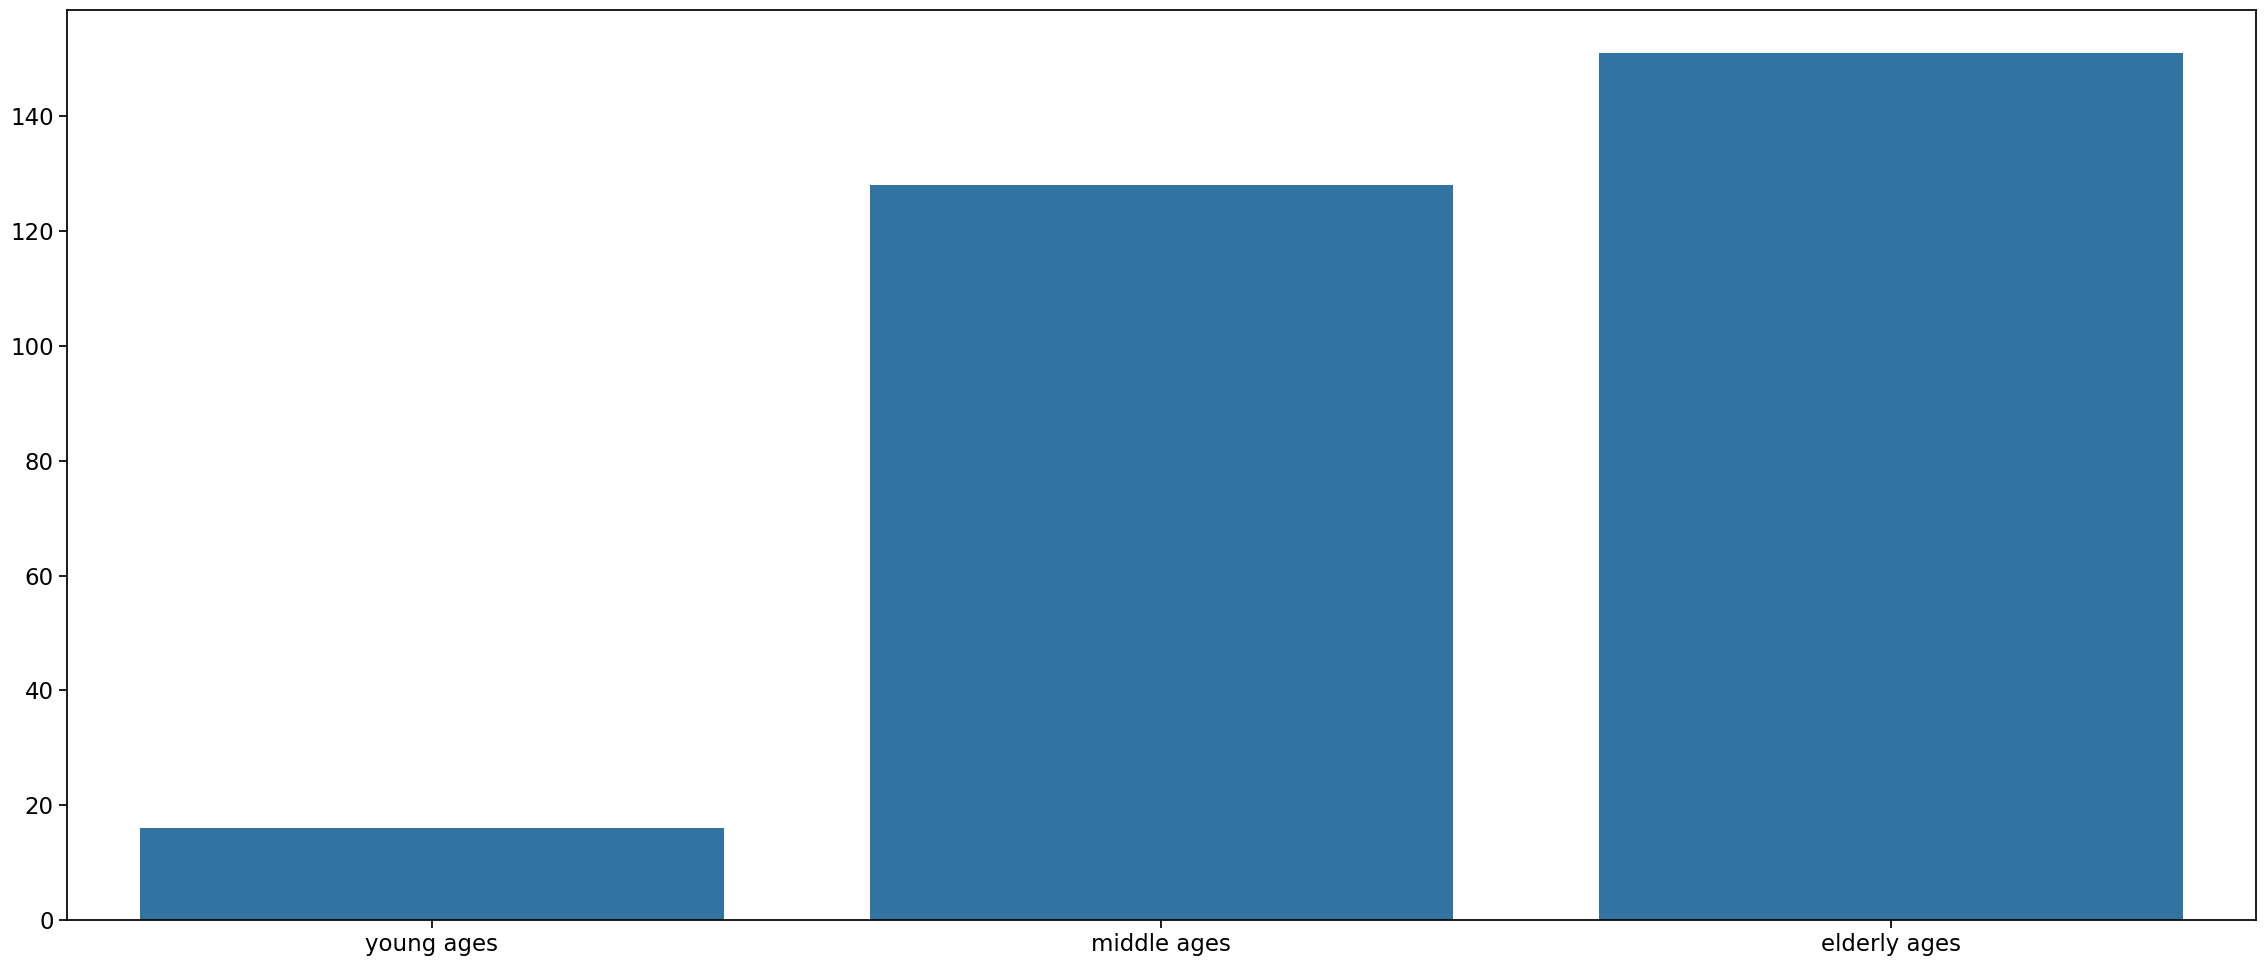

In [ ]:
plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**A large proportion of dataset contains Elder people.**

**Elderly people are more likely to suffer from heart disease.**

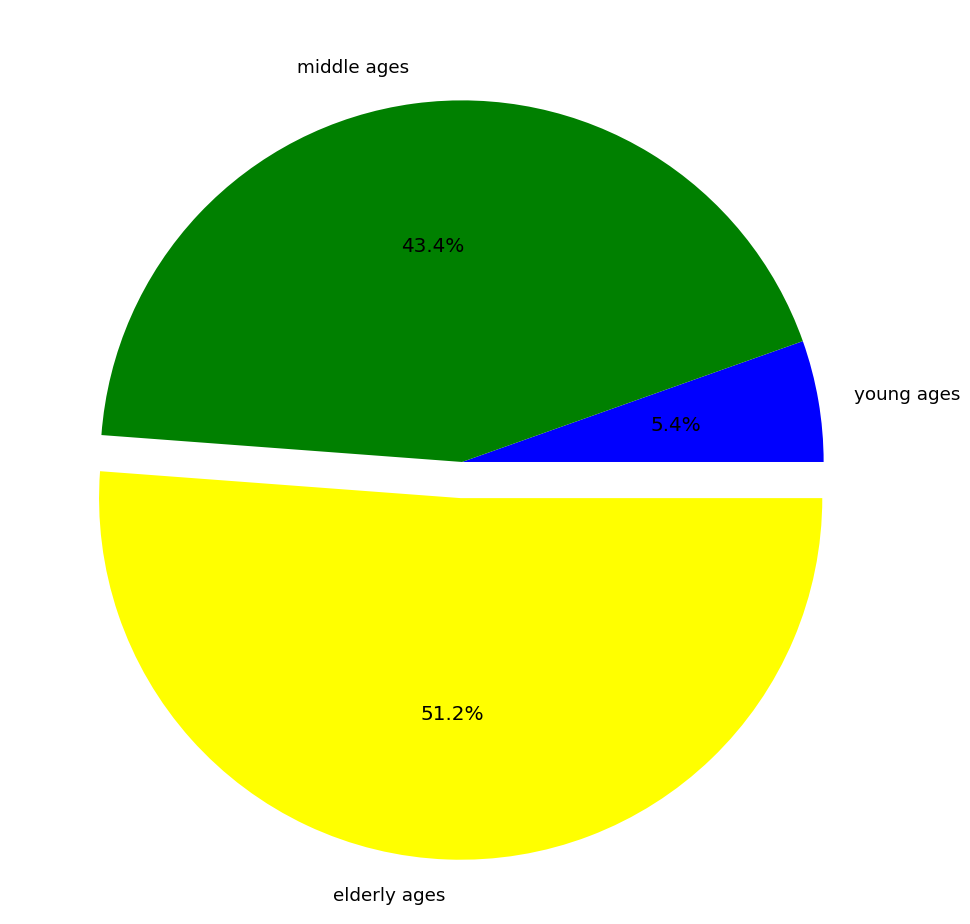

In [ ]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

## Sex("sex") Feature Analysis

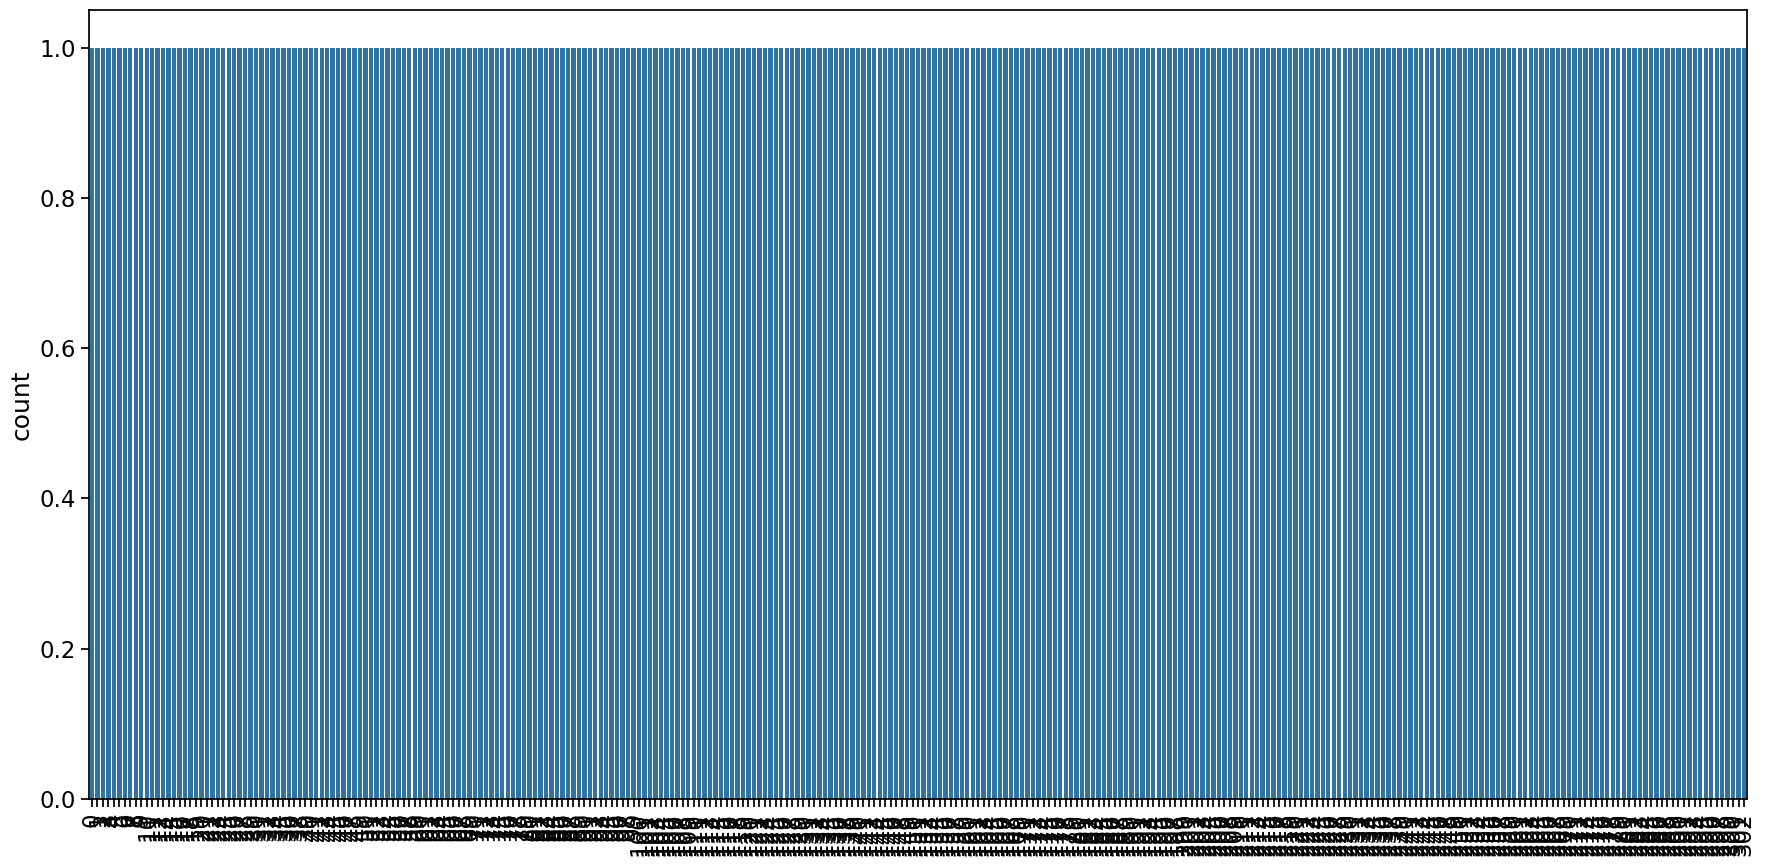

In [ ]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data['sex'])
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Ratio of Male to Female is approx 2:1**

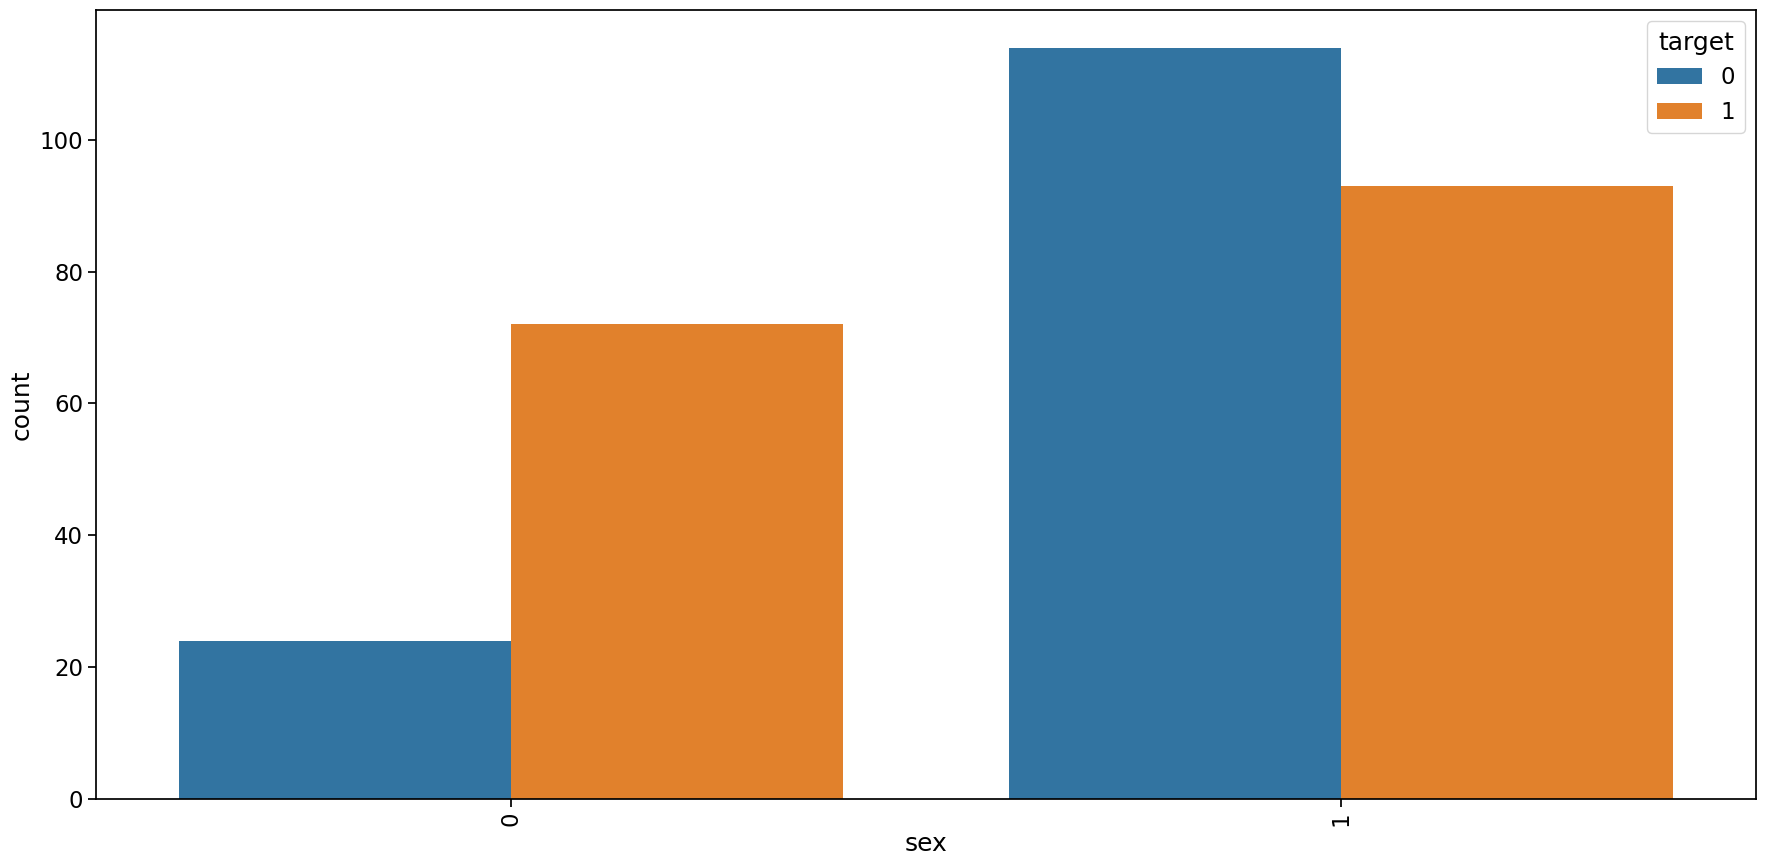

In [ ]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='sex', hue='target', data=data)  # Add 'hue' as needed
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.tight_layout()
plt.show()

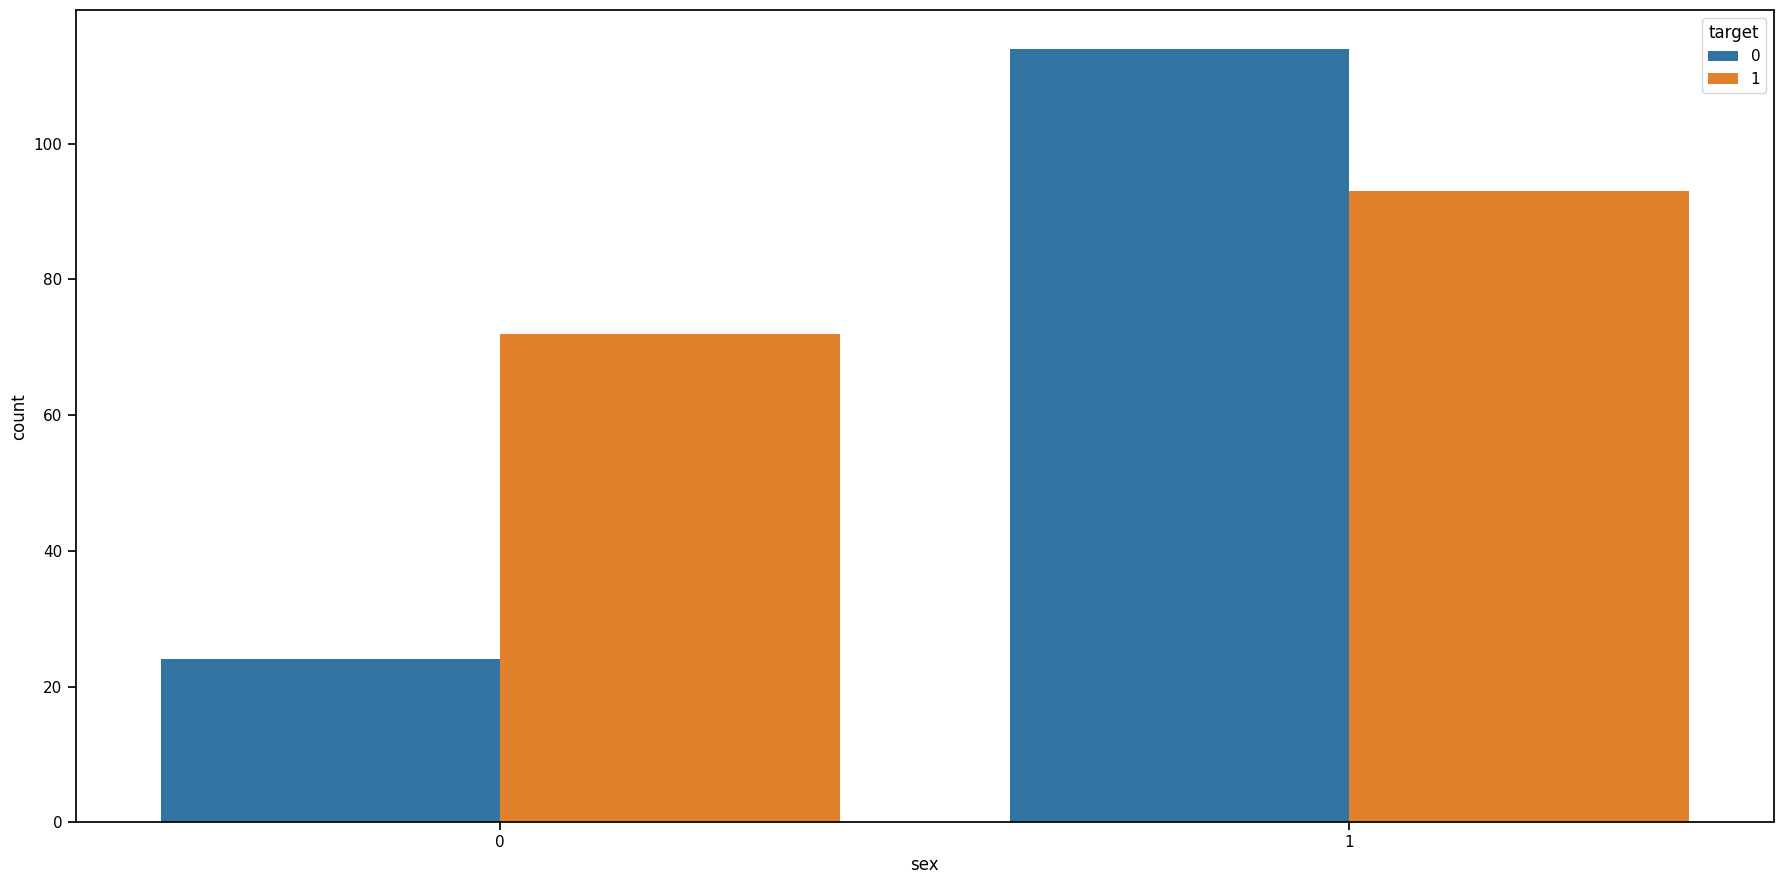

In [ ]:
# Let's plot the relation between sex and target.

plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.0)
sns.countplot(x='sex', hue='target', data=data)  # Specify 'x' and 'hue'
plt.xticks(rotation=0)  # Keep labels horizontal since there are only two categories
plt.tight_layout()
plt.show()

**Males are more likely to have heart disease than Female.**

## Chest Pain Type("cp") Analysis

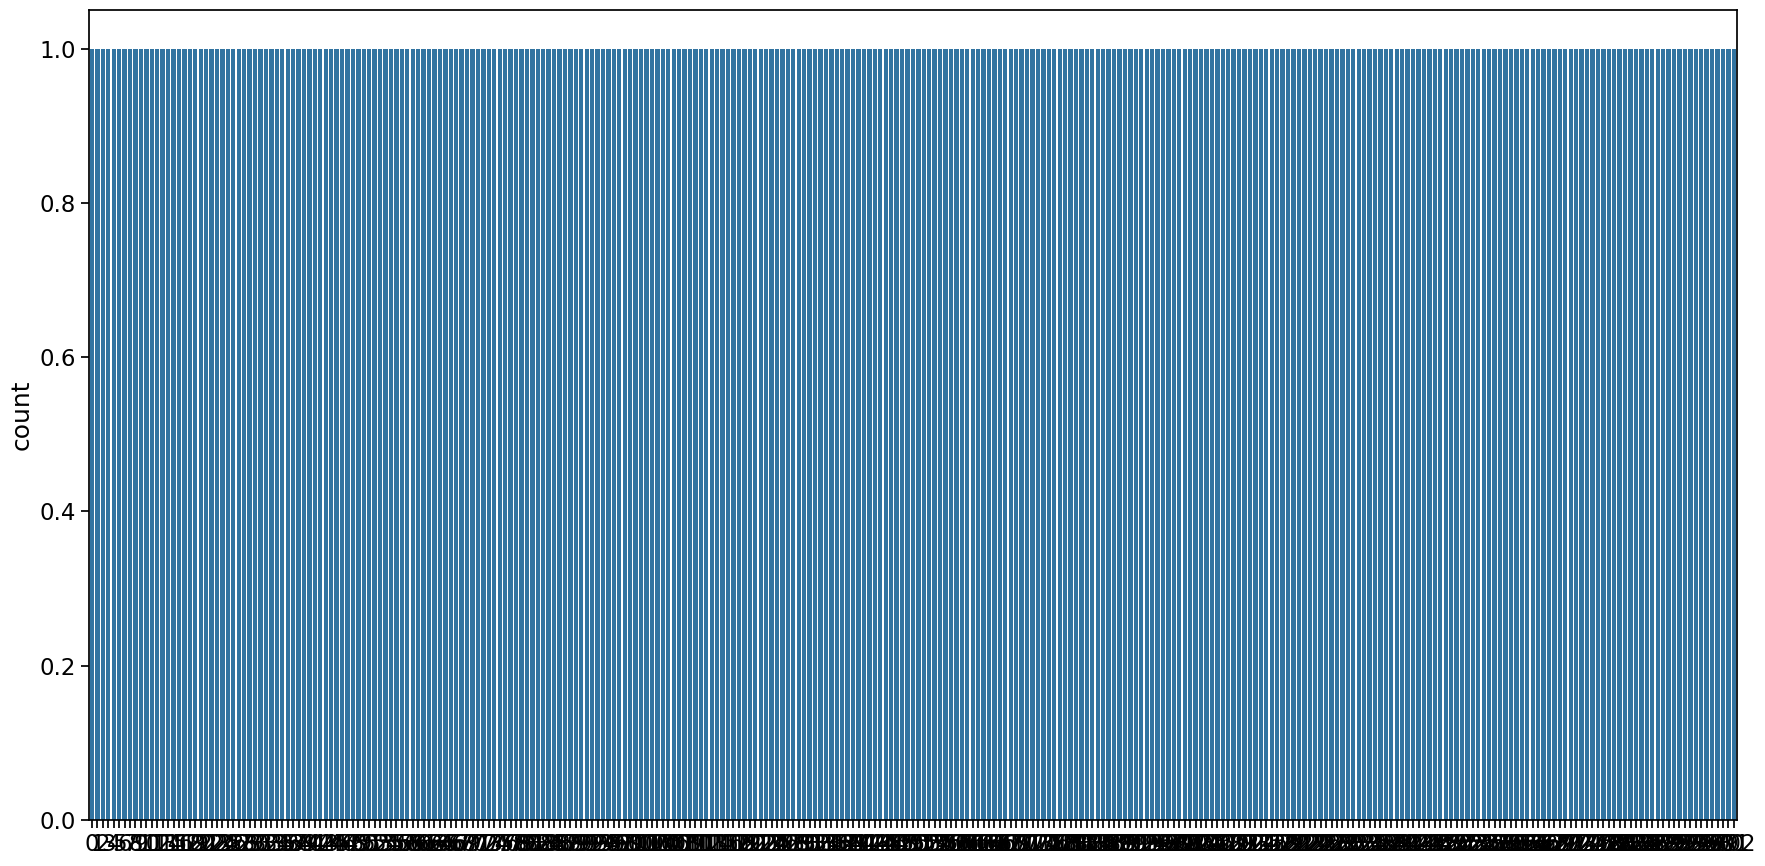

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()

**As seen, there are 4 types of chest pain**

1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad

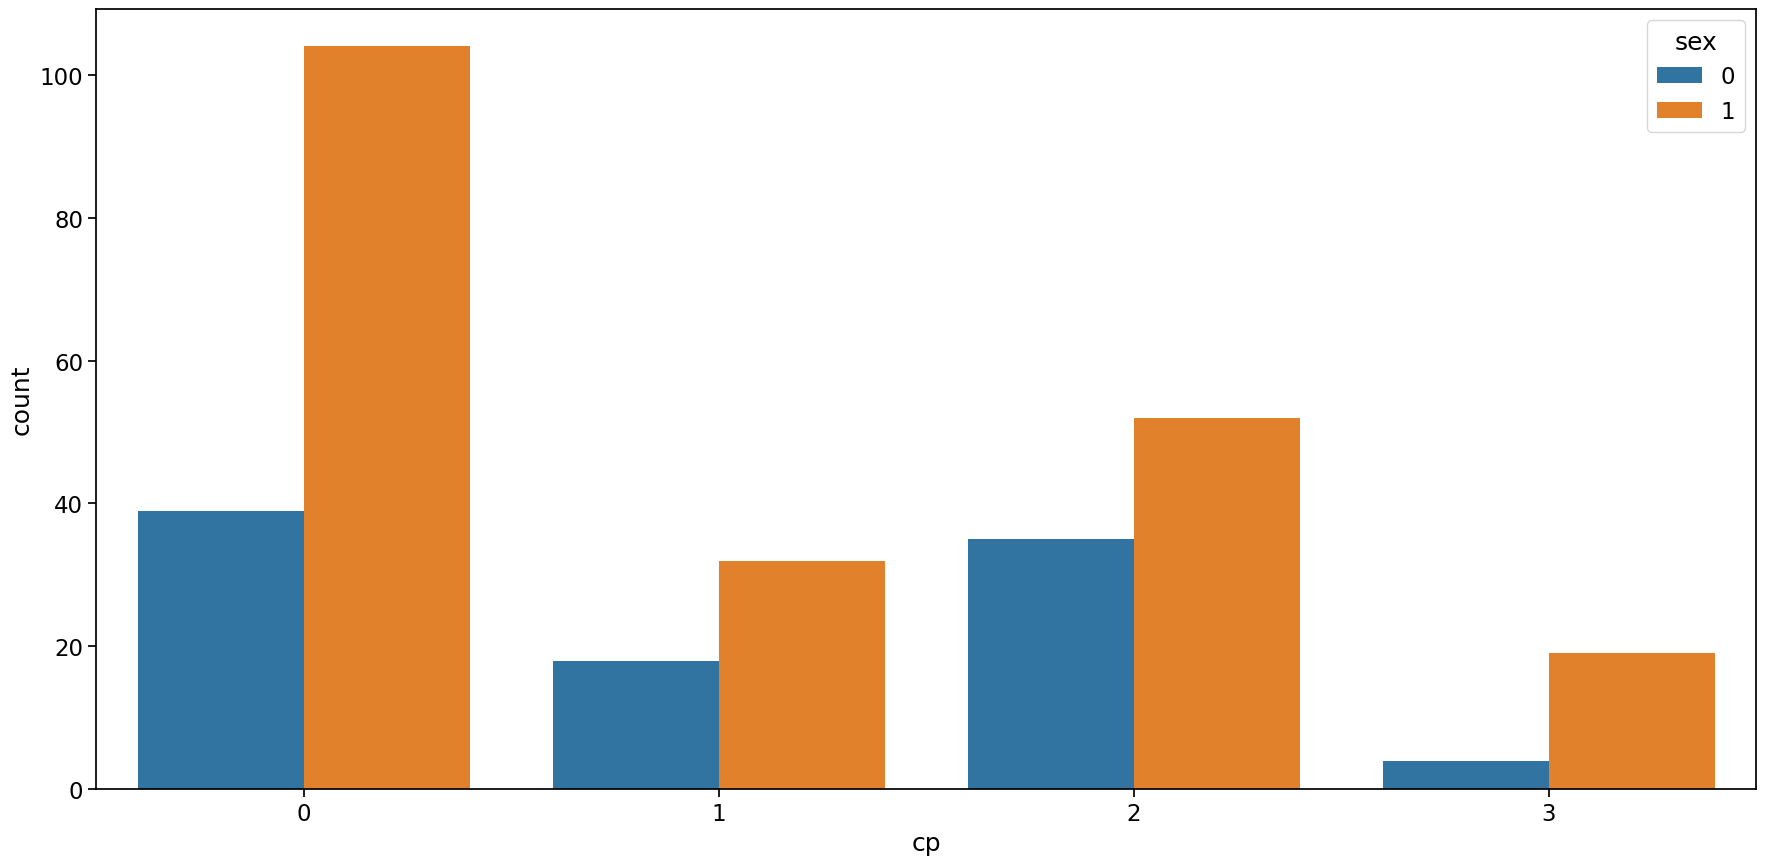

In [ ]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='cp', hue='sex', data=data)  # Correctly specify 'x' and 'hue'
plt.tight_layout()
plt.show()

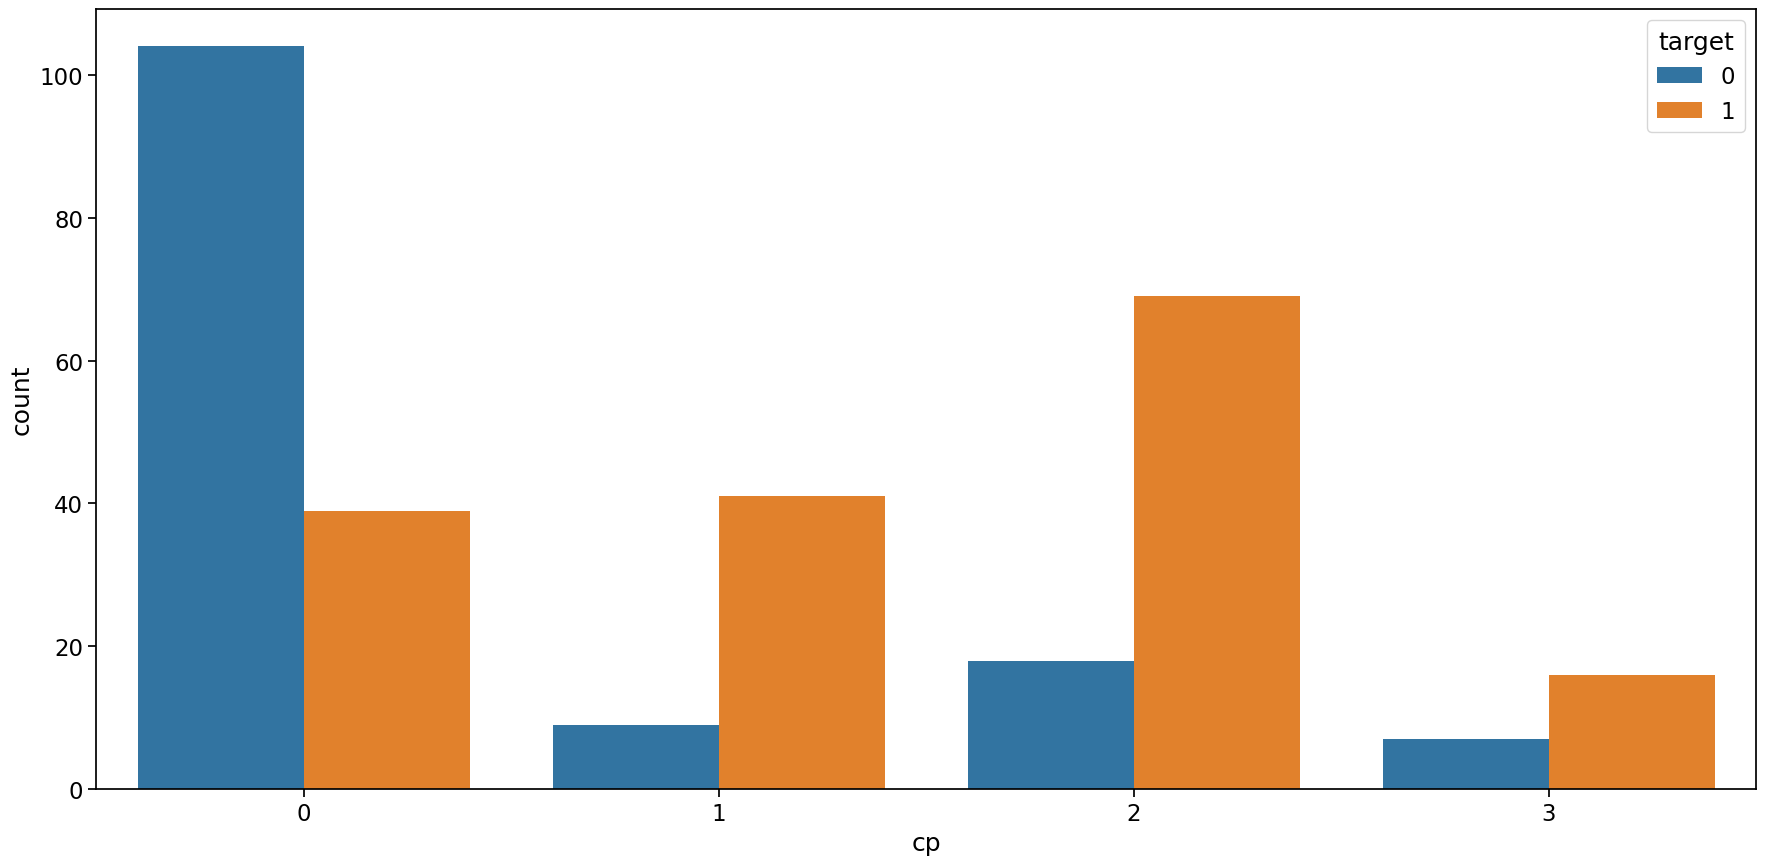

In [ ]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='cp', hue='target', data=data)  # Correctly specify 'x' and 'hue'
plt.tight_layout()
plt.show()

* People having least chest pain are not likely to heart disease.
* People having severe chest pain are  likely to heart disease.

**Elderly people are more likely to have chest pain.**

# Thal Analysis

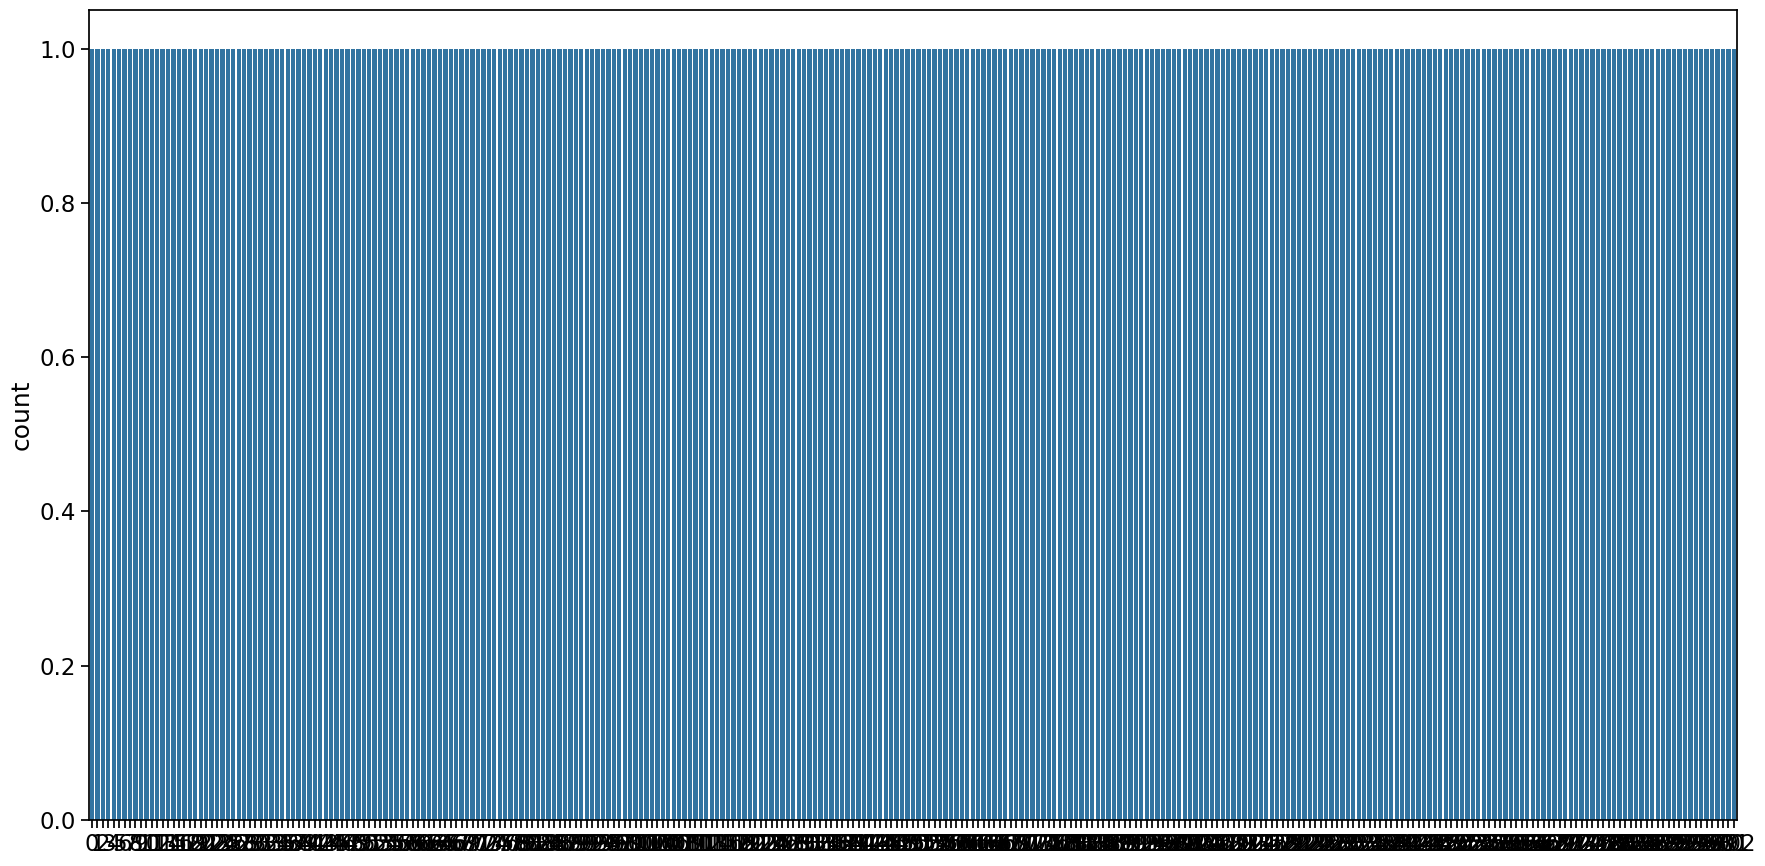

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'])
plt.tight_layout()

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. 3 = normal
2. 6 = fixed defect
3. 7 = reversable defect

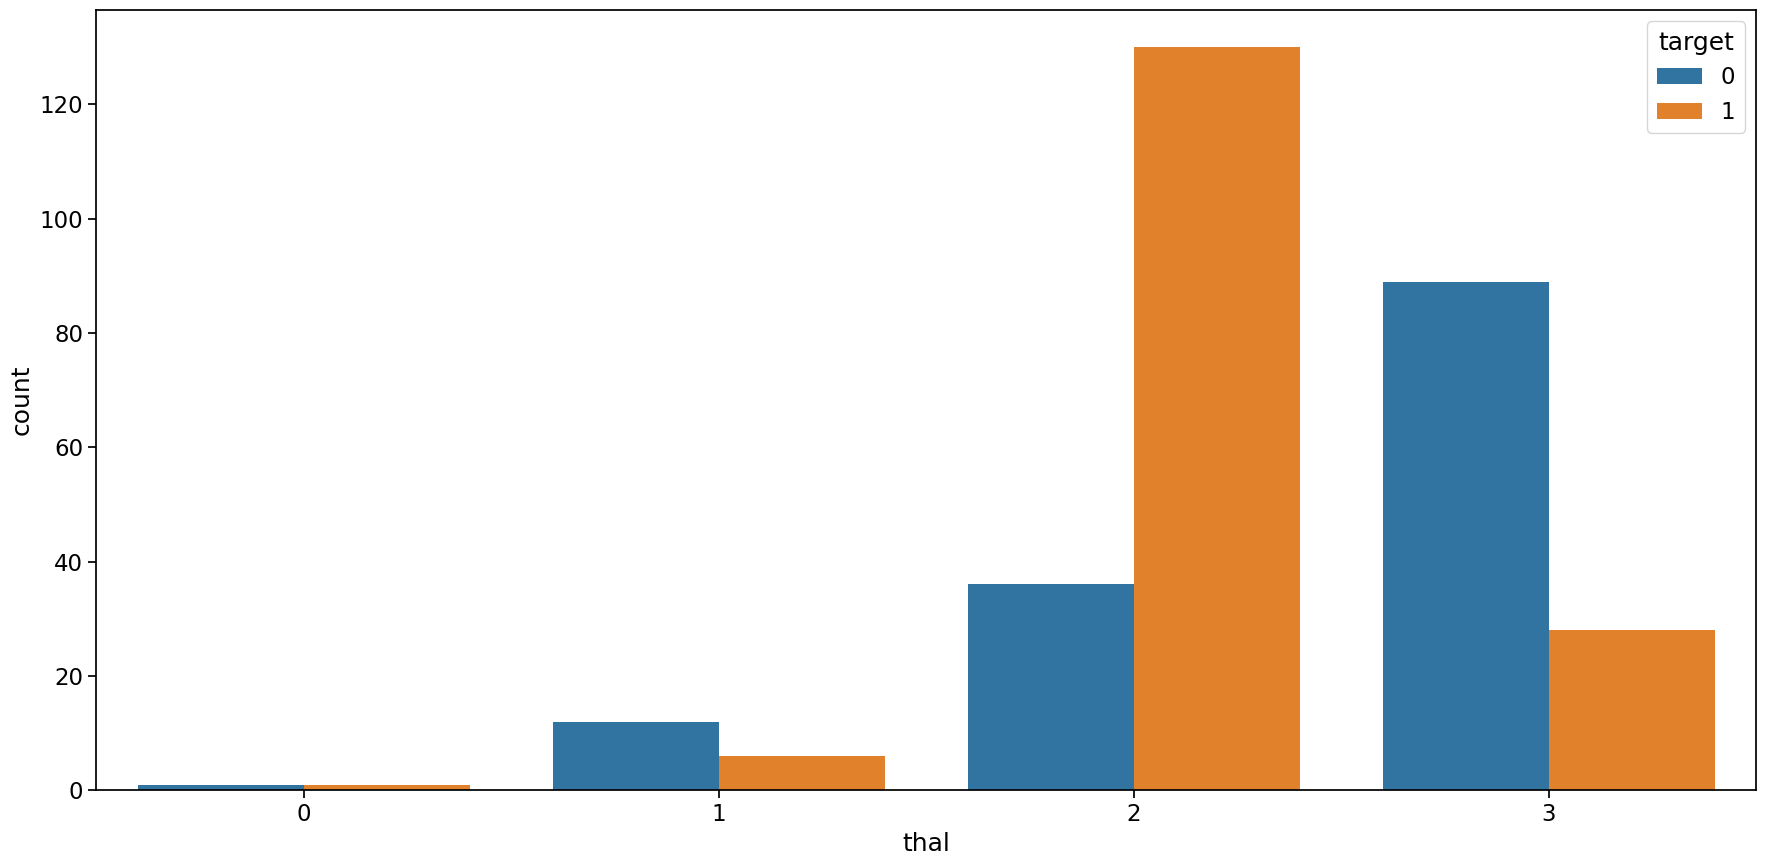

In [ ]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='thal', hue='target', data=data)  # Correctly specify 'x' and 'hue'
plt.tight_layout()
plt.show()

**People with fixed defect are more likely to have heart disease.**

In [ ]:
# Define age ranges (bins)
bins = [29, 40, 50, 60, 70, 80]
labels = ['30-40', '41-50', '51-60', '61-70', '71-80']

# Create a new AgeRange column based on the bins
data['AgeRange'] = pd.cut(data['age'], bins=bins, labels=labels)

<ipython-input-34-db5a88e9e86e>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x="AgeRange", y="age", data=data, palette=["r", "c", "y"], hue="thal")


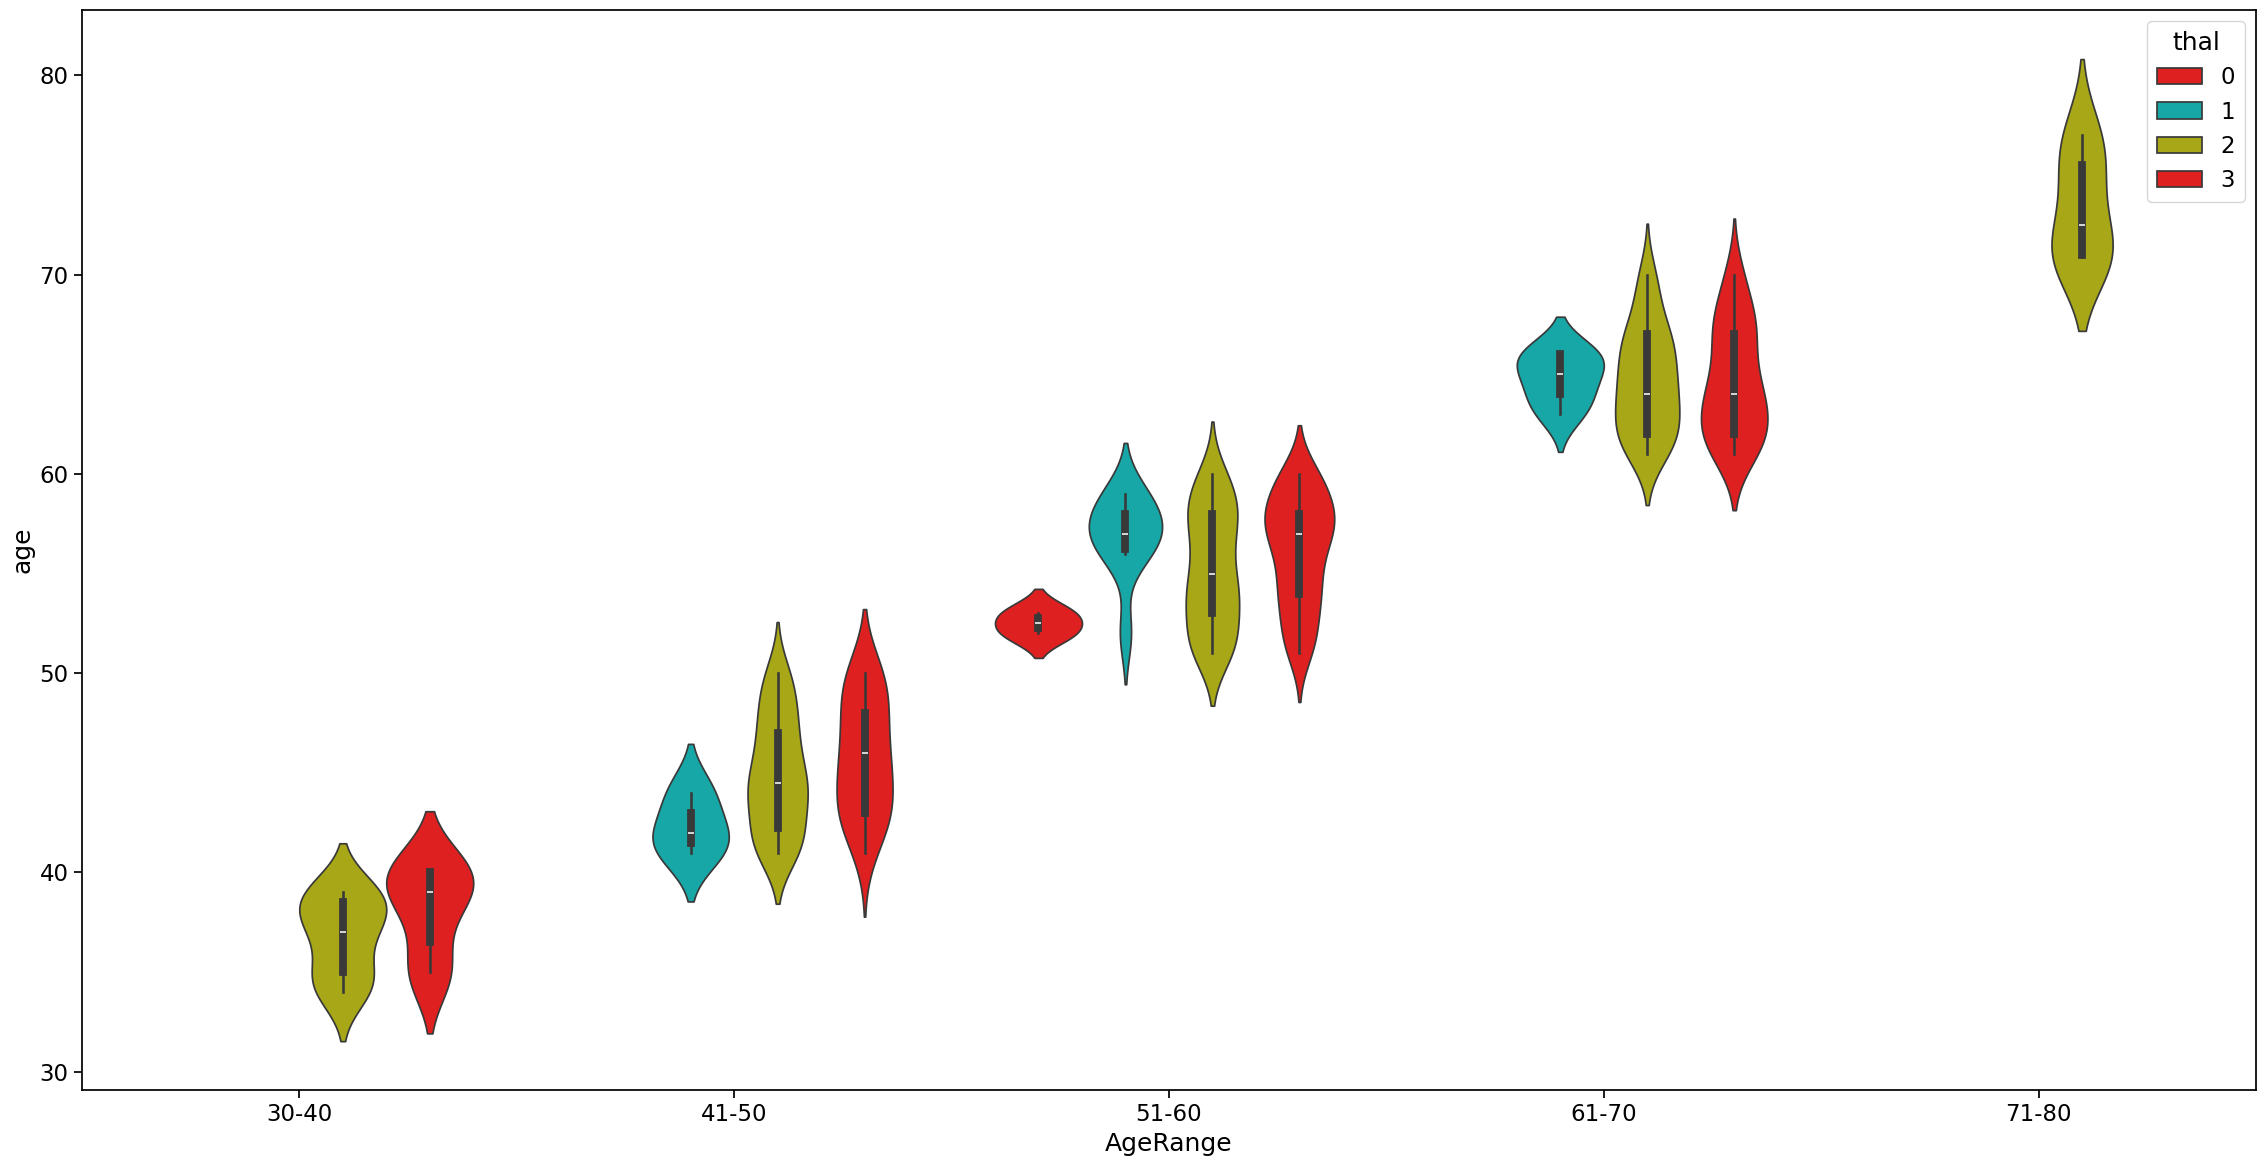

In [ ]:
plt.figure(figsize=(23, 12))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="AgeRange", y="age", data=data, palette=["r", "c", "y"], hue="thal")
plt.tight_layout()
plt.show()

## Target

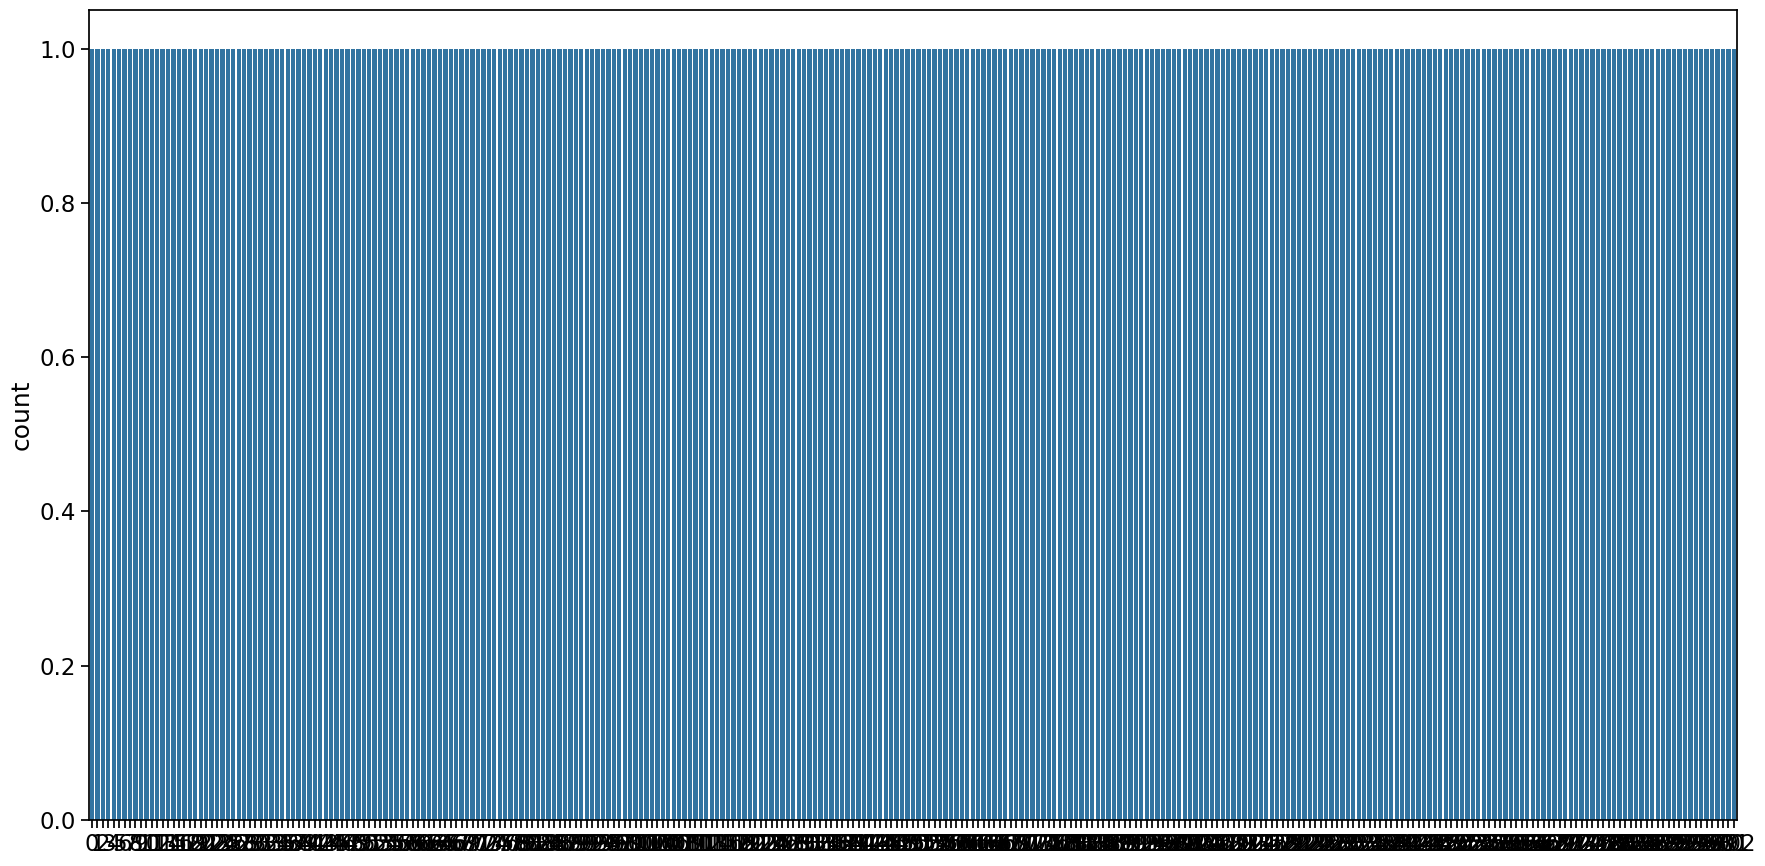

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()

**The ratio between 1 and 0 is much less than 1.5 which indicates that target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.**

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60


# Feature Enginnering

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

In [ ]:
categorical_val.remove('target')
dfs = pd.get_dummies(data, columns = categorical_val)

In [ ]:
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,AgeRange_30-40,AgeRange_41-50,AgeRange_51-60,AgeRange_61-70,AgeRange_71-80
0,63,145,233,150,2.3,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,37,130,250,187,3.5,1,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
2,41,130,204,172,1.4,1,True,False,False,True,...,False,False,False,True,False,False,True,False,False,False
3,56,120,236,178,0.8,1,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
4,57,120,354,163,0.6,1,True,False,True,False,...,False,False,False,True,False,False,False,True,False,False
5,57,140,192,148,0.4,1,False,True,True,False,...,False,False,True,False,False,False,False,True,False,False


In [ ]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])

In [ ]:
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,AgeRange_30-40,AgeRange_41-50,AgeRange_51-60,AgeRange_61-70,AgeRange_71-80
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,False,False,False,True,False,False,True,False,False,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,False,False,False,True,False,False,False,True,False,False
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,False,True,True,False,...,False,False,True,False,False,False,False,True,False,False


# Modelling

**Splitting our dataset**

In [ ]:
X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_4,thal_0,thal_1,thal_2,thal_3,AgeRange_30-40,AgeRange_41-50,AgeRange_51-60,AgeRange_61-70,AgeRange_71-80
124,-1.694735,-2.148802,-0.913400,1.283627,-0.896862,True,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
72,-2.797624,-0.092738,-0.816773,2.289429,-0.896862,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
15,-0.481558,-0.663867,-0.526890,0.365287,0.483451,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
10,-0.040403,0.478391,-0.140381,0.452748,0.138373,False,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False
163,-1.805024,0.364165,-1.377212,1.021244,-0.896862,False,True,False,False,True,...,True,False,False,True,False,True,False,False,False,False


We will work on following algo -

* KNN
* Random Forest Classifier
* XGBoost
* CatBoost

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred1 = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.8681318681318682


In [ ]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

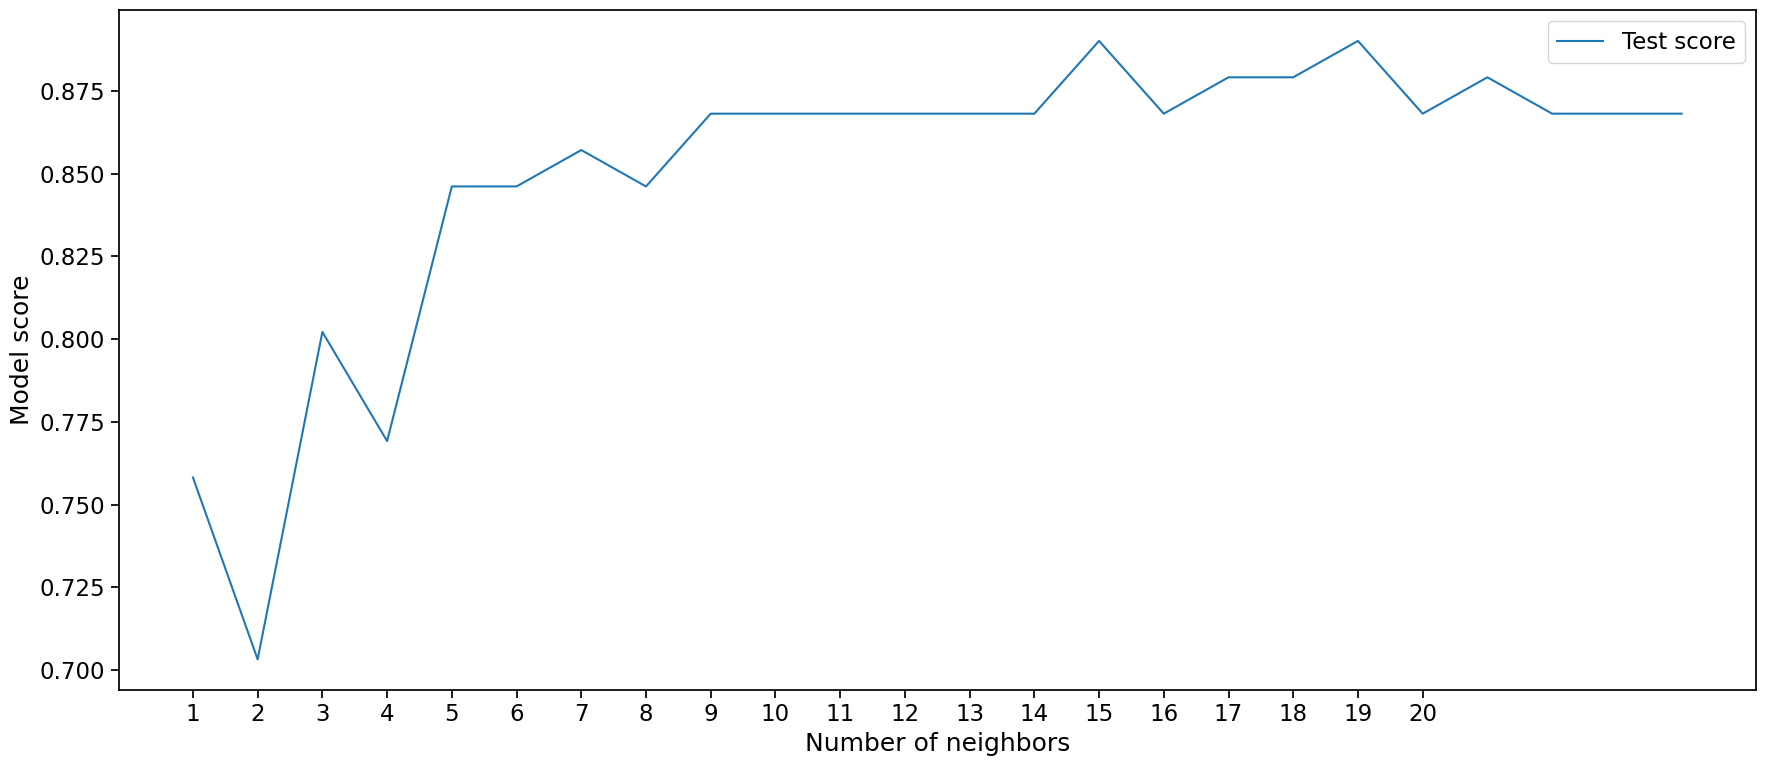

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

**At K=19, we are getting highest test accuracy.**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred1 = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.8901098901098901


**We achieved accuracy 89% with KNN Model after Hyperparameter Optimization.**

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))

0.8241758241758241


In [ ]:
## Hyperparameter Optimization

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

params2 ={

    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

rfcs = RandomizedSearchCV(estimator=rfc, param_distributions=params2, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rfcs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
205 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rfcs.best_estimator_

RandomForestClassifier(max_depth=60, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1800, random_state=42)

In [ ]:
y_pred2 = rfcs.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.8241758241758241


**We achieved accuracy 83% approx with Random Forest Classifier Model. There is no improvement after Hyperparameter Optimization.**

## XGBoost

In [ ]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)
y_pred3 = xgb.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred3))

0.7692307692307693


**We achieved accuracy 77% approx with XGBoost Classifier Model.**

## CatBoost

In [ ]:
model4 = CatBoostClassifier(random_state=42)

In [ ]:
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

Learning rate set to 0.005312
0:	learn: 0.6894650	total: 49.3ms	remaining: 49.3s
1:	learn: 0.6844049	total: 51.6ms	remaining: 25.8s
2:	learn: 0.6795523	total: 53.5ms	remaining: 17.8s
3:	learn: 0.6749063	total: 56.1ms	remaining: 14s
4:	learn: 0.6704680	total: 59.6ms	remaining: 11.9s
5:	learn: 0.6657445	total: 62.6ms	remaining: 10.4s
6:	learn: 0.6607664	total: 71ms	remaining: 10.1s
7:	learn: 0.6575312	total: 74.4ms	remaining: 9.22s
8:	learn: 0.6531291	total: 78.5ms	remaining: 8.65s
9:	learn: 0.6488184	total: 82ms	remaining: 8.12s
10:	learn: 0.6443461	total: 85.4ms	remaining: 7.68s
11:	learn: 0.6407861	total: 86.9ms	remaining: 7.15s
12:	learn: 0.6361081	total: 89.1ms	remaining: 6.77s
13:	learn: 0.6318380	total: 91.8ms	remaining: 6.46s
14:	learn: 0.6276794	total: 93.9ms	remaining: 6.17s
15:	learn: 0.6241600	total: 96.9ms	remaining: 5.96s
16:	learn: 0.6205602	total: 102ms	remaining: 5.92s
17:	learn: 0.6172624	total: 105ms	remaining: 5.73s
18:	learn: 0.6141347	total: 109ms	remaining: 5.64s
1

In [ ]:
print(accuracy_score(y_test,y_pred4))

0.8131868131868132


**We achieved accuracy 81% approx with CatBoost Classifier Model.**

### Conclusion

**From the above models KNN is giving us the best accuracy which is 89%.**